In [3]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [7]:
mnits_data = mnist.load_data()

In [8]:
(X_train, y_train), (X_valid, y_valid) = mnits_data

In [19]:
X_valid[0].shape

(28, 28)

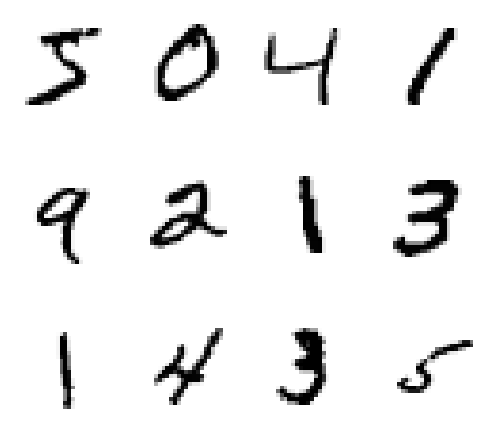

In [21]:
plt.figure(figsize=(5,5)) # 设置图片大小为5*5
for k in range(12):
    plt.subplot(3,4, k+1) # 图片墙大小：3行4列
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

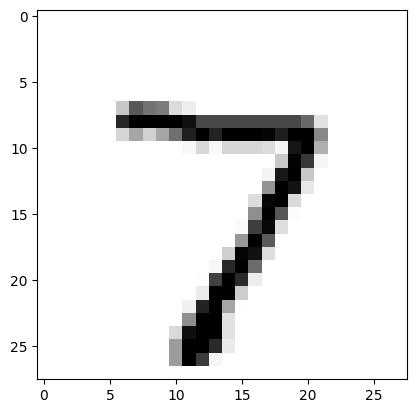

In [22]:
plt.imshow(X_valid[0], cmap='Greys')

### Flattening two-dimensional images to one dimension

In [23]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

###  Scaling pixel integers to range from 0 to 1

In [24]:
X_train /= 255
X_valid /= 255

### Converting integer labels to one-hot

In [27]:
n_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_valid = tf.keras.utils.to_categorical(y_valid, n_classes)

<b>to_categorical</b> transform both the training and the validation labels from integers into the one-hot format

In [28]:
y_valid

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

###  Keras code to architect a shallow neural network

In [30]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

2023-04-12 03:28:51.630700: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-12 03:28:51.711449: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-12 03:28:51.711718: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-12 03:28:51.717401: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-12 03:28:51.717579: I tensorflow/compile

### Keras code to train our shallow neural network

In [31]:
model.fit(X_train, # inputs
          y_train, # desired outpus
          batch_size=128, epochs=200,
          verbose=1,
          validation_data=(X_valid, y_valid))

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.